# <span style="color: darkorange">Project 4: Clustering
### <span style="color: orange">Fabiola Rojas</span>
---

## <span style="color: darkorange">The Problem</span> 
This project explores how clustering can be used to better understand beer tasting profiles and consumer preferences. Specifically, I aim to answer two related questions:

- Can beers be grouped based on their tasting characteristics, and how do these clusters compare to the labeled beer styles?
- Are there specific clusters of beers that tend to receive higher consumer ratings, and what do those beers have in common?

The dataset contains information on over 3,000 beers, including tasting profile features (such as bitterness, sweetness, and fruitiness), as well as average user ratings for aspects like aroma, appearance, and taste. These attributes provide a foundation for clustering the beers based on both flavor and perception.

This project has two parts: first, to see whether beers naturally form distinct taste-based groupings, and whether those groupings align with traditional style labels (like IPA or Stout); and second, to analyze these clusters to identify which flavor combinations are most associated with highly-rated beers.

This analysis could provide insight into how well beer styles are defined in practice, and what tasting features tend to contribute to a positive consumer experience.

---

## <span style="color: darkorange">What is clustering and how does it work?
Clustering is an unsupervised machine learning technique used to group data points based on similarity. Unlike supervised learning methods that rely on labeled data, clustering finds hidden patterns or groupings within a dataset without predefined categories. The objective is to ensure that items within the same cluster are more similar to each other than to those in other clusters.

One of the most commonly used clustering algorithms is K-Means, which partitions the data into k clusters. It works by:

1. Selecting k initial centroids randomly.

2. Assigning each data point to the nearest centroid based on a distance metric, typically Euclidean distance.

3. Updating the centroids by computing the mean of all points assigned to each cluster.

4. Repeating steps 2 and 3 until the centroids stabilize (converge) or a maximum number of iterations is reached.

Another method is Agglomerative Clustering, a type of hierarchical clustering. This algorithm starts with each data point as its own cluster and iteratively merges the closest pair of clusters until a single cluster or the desired number of clusters is achieved. It builds a dendrogram (tree structure), which can be cut at different levels to yield different numbers of clusters.

Both methods have their strengths: K-Means is efficient and works well with large datasets when clusters are spherical and evenly sized, while Agglomerative Clustering provides a more flexible structure and is often better at handling irregular cluster shapes.

---

## <span style="color: darkorange">The Data
The dataset used in this project is the [Beer Profile and Ratings Dataset](https://www.kaggle.com/datasets/ruthgn/beer-profile-and-ratings-data-set/data?select=beer_profile_and_ratings.csv) available on Kaggle. It contains detailed information on 3,197 unique beers from 934 breweries, integrating both consumer review data and tasting profile features.

The data was compiled by merging two existing Kaggle datasets: the Beer Tasting Profiles Dataset, which provides flavor descriptors based on word frequency in beer reviews, and the 1.5 Million Beer Reviews Dataset, which includes numerical ratings and textual descriptions from beer enthusiasts.

Key features in the dataset include basic information like beer name, style, and brewery, as well as quantitative characteristics (ABV, IBU), tasting profile features, and consumer review scores. The tasting profile features (astringency, sweet, sour, hoppy, etc.) are integer values derived from word counts in up to 25 reviews of each beer. The consumer reviews are on a scale from 1-5. This dataset allows for multi-dimensional analysis of beers—not only how they taste, but how they are perceived by consumers.


---

## <span style="color: darkorange">Data Understanding

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv("/Users/fabiolarojas/Documents/itcs3162/beer_profile_and_ratings.csv")
pd.set_option('display.max_columns', None)
df.head()

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,18,33,55,16,0,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,6,42,43,11,0,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,31,47,101,18,1,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,26,44,45,9,1,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


In [8]:
# check for nulls and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3197 non-null   object 
 2   Brewery            3197 non-null   object 
 3   Beer Name (Full)   3197 non-null   object 
 4   Description        3197 non-null   object 
 5   ABV                3197 non-null   float64
 6   Min IBU            3197 non-null   int64  
 7   Max IBU            3197 non-null   int64  
 8   Astringency        3197 non-null   int64  
 9   Body               3197 non-null   int64  
 10  Alcohol            3197 non-null   int64  
 11  Bitter             3197 non-null   int64  
 12  Sweet              3197 non-null   int64  
 13  Sour               3197 non-null   int64  
 14  Salty              3197 non-null   int64  
 15  Fruits             3197 non-null   int64  
 16  Hoppy              3197 

In [9]:
df.describe()

,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
count,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000
mean,6.526688,21.180482,38.986863,16.515796,46.129496,17.055990,36.364404,58.270879,33.145449,1.017204,38.529559,40.924617,18.345637,75.330935,3.638789,3.754393,3.660428,3.702496,3.747522,233.284955
std,2.546997,13.242242,21.355281,10.410661,25.947842,17.331334,25.791152,34.281310,35.780172,2.132651,32.296646,30.403641,23.756582,39.909338,0.503209,0.403416,0.449937,0.510361,0.444288,361.811847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.509615,1.571429,1.285714,1.214286,1.136364,1.000000
25%,5.000000,15.000000,25.000000,9.000000,29.000000,6.000000,17.000000,33.000000,11.000000,0.000000,12.000000,18.000000,4.000000,45.000000,3.422559,3.604651,3.470021,3.500000,3.566667,23.000000
50%,6.000000,20.000000,35.000000,14.000000,40.000000,11.000000,31.000000,54.000000,22.000000,0.000000,29.000000,33.000000,10.000000,73.000000,3.720183,3.833333,3.741667,3.791667,3.830239,93.000000
75%,7.600000,25.000000,45.000000,21.000000,58.000000,22.000000,52.000000,77.000000,42.000000,1.000000,60.000000,56.000000,23.000000,103.000000,3.978000,4.000000,3.965587,4.033333,4.032847,284.000000
max,57.500000,65.000000,100.000000,81.000000,175.000000,139.000000,150.000000,263.000000,284.000000,48.000000,175.000000,172.000000,184.000000,239.000000,5.000000,4.666667,5.000000,5.000000,5.000000,3290.000000


In [10]:
print("Number of unique beer styles:", df['Style'].nunique())
print("Number of unique breweries:", df['Brewery'].nunique())
print("Number of unique beers:", df['Beer Name (Full)'].nunique())

Number of unique beer styles: 111
Number of unique breweries: 934
Number of unique beers: 3197


# **SUMMARY**

## <span style="color: darkorange">Visualization

In [13]:
# lowercase all column names
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['name', 'style', 'brewery', 'beer name (full)', 'description', 'abv',
       'min ibu', 'max ibu', 'astringency', 'body', 'alcohol', 'bitter',
       'sweet', 'sour', 'salty', 'fruits', 'hoppy', 'spices', 'malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews'],
      dtype='object')

In [14]:
# drop unnecessary identifier columns
df = df.drop(columns=['name', 'brewery', 'description'])

In [15]:
# combine min ibu and max ibu into a single average ibu column
df['ibu'] = df[['min ibu', 'max ibu']].mean(axis=1)
df = df.drop(columns=['min ibu', 'max ibu'])

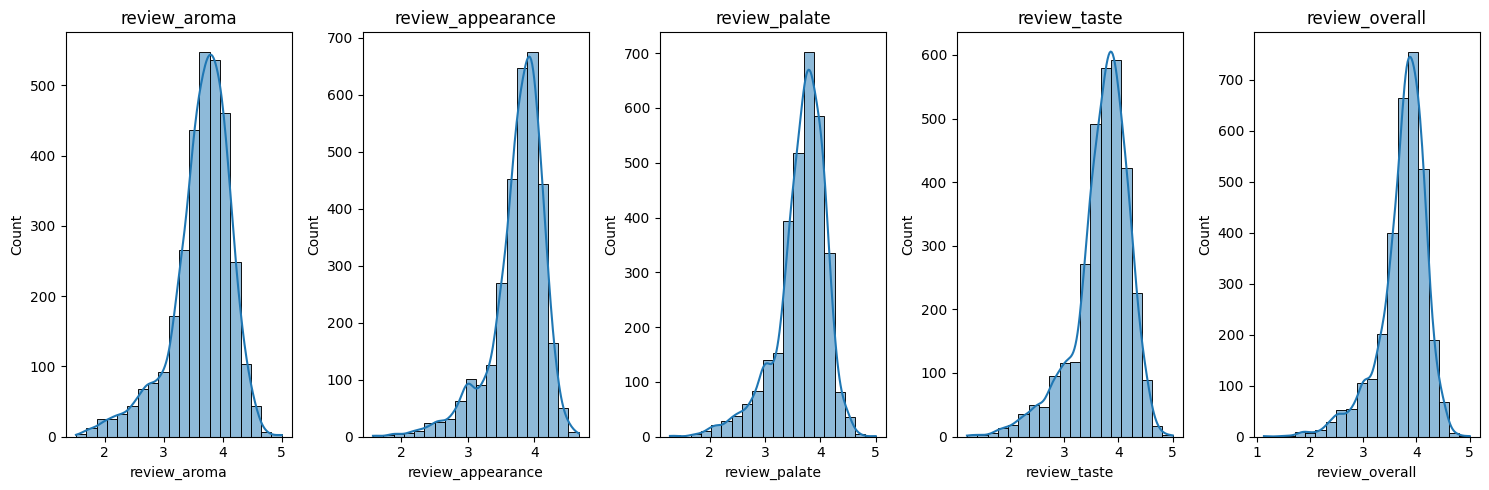

In [16]:
review_cols = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_overall']

plt.figure(figsize=(15, 5))
for i, col in enumerate(review_cols):
    plt.subplot(1, 5, i+1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()


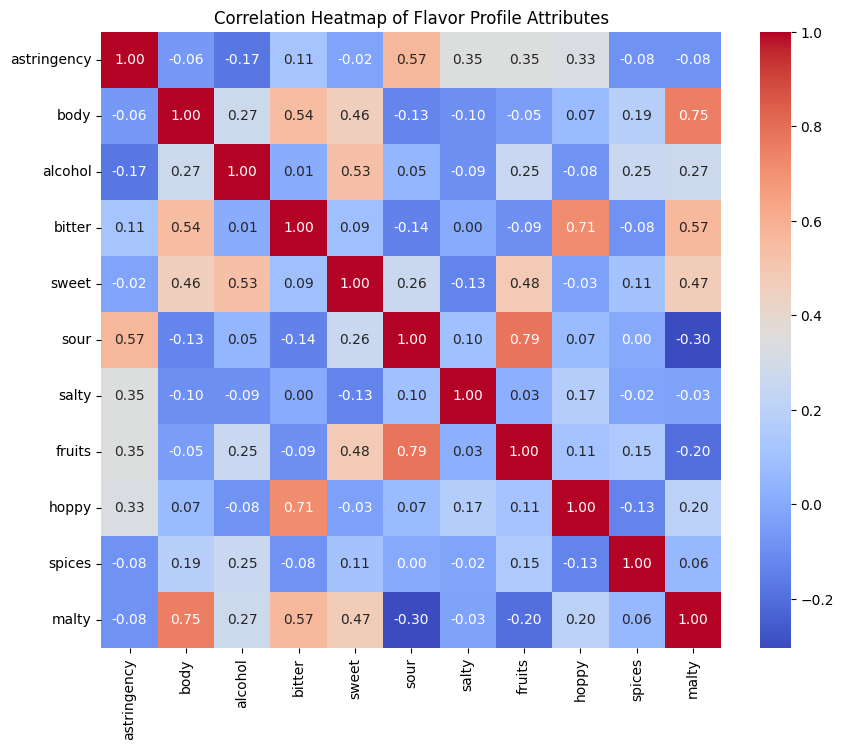

In [17]:
flavor_cols = ['astringency', 'body', 'alcohol', 'bitter', 'sweet', 'sour',
               'salty', 'fruits', 'hoppy', 'spices', 'malty']

plt.figure(figsize=(10, 8))
sns.heatmap(df[flavor_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Flavor Profile Attributes")
plt.show()


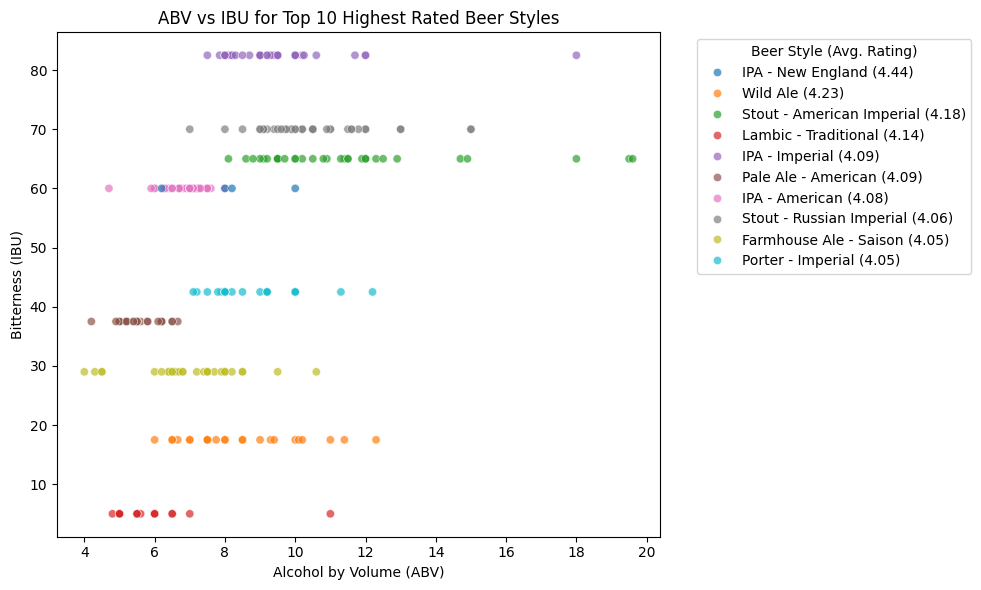

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get top 10 styles by average overall review score
avg_scores = df.groupby('style')['review_overall'].mean()
top_rated_styles = avg_scores.sort_values(ascending=False).head(10)

# Step 2: Map styles to formatted labels like "Style (4.25)"
style_labels = {
    style: f"{style} ({avg_scores[style]:.2f})"
    for style in top_rated_styles.index
}

# Step 3: Create new labeled column
subset = df[df['style'].isin(top_rated_styles.index)].copy()
subset['style_label'] = subset['style'].map(style_labels)

# Step 4: Sort labels in correct order for legend
ordered_labels = [style_labels[style] for style in top_rated_styles.index]

# Step 5: Plot with custom legend order
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=subset,
    x='abv',
    y='ibu',
    hue='style_label',
    hue_order=ordered_labels,
    alpha=0.7
)
plt.title('ABV vs IBU for Top 10 Highest Rated Beer Styles')
plt.xlabel('Alcohol by Volume (ABV)')
plt.ylabel('Bitterness (IBU)')
plt.legend(title='Beer Style (Avg. Rating)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


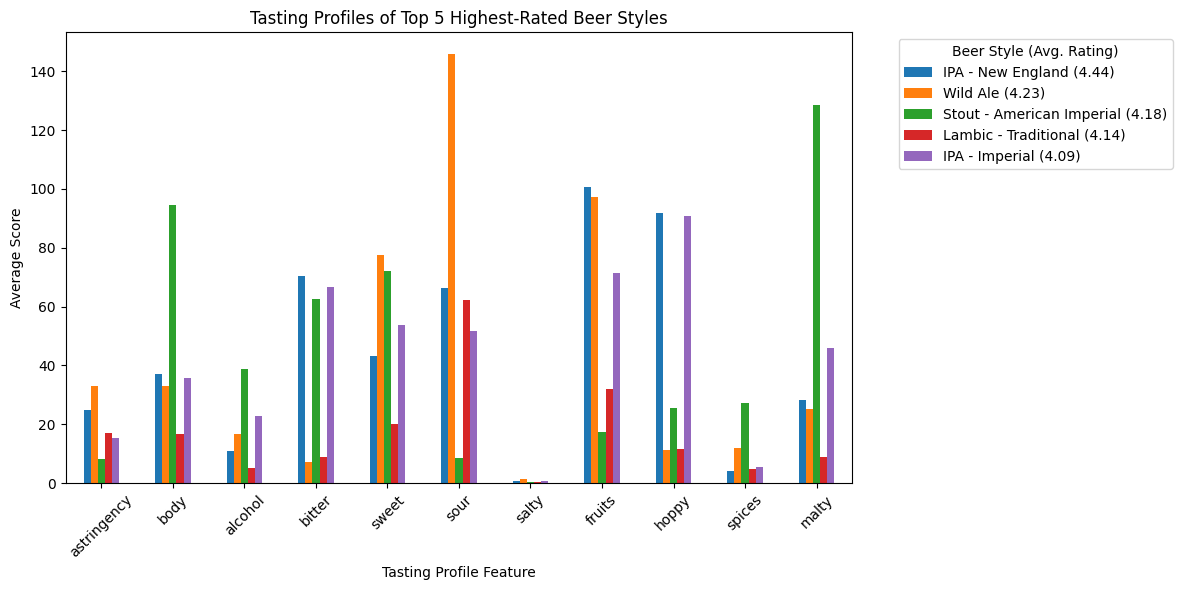

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define tasting profile columns
tasting_features = ['astringency', 'body', 'alcohol', 'bitter', 'sweet', 
                    'sour', 'salty', 'fruits', 'hoppy', 'spices', 'malty']

# Compute average review_overall for each style
style_avg_rating = df.groupby('style')['review_overall'].mean()
top_styles_by_rating = style_avg_rating.nlargest(5)

# Filter dataset to just those styles
subset = df[df['style'].isin(top_styles_by_rating.index)]

# Compute average tasting profile per style
avg_tasting_profiles = subset.groupby('style')[tasting_features].mean()

# Reorder rows of tasting profiles to match top rating order
avg_tasting_profiles = avg_tasting_profiles.loc[top_styles_by_rating.index]

# Create labeled legend names with average scores
legend_labels = [f"{style} ({score:.2f})" for style, score in top_styles_by_rating.items()]
avg_tasting_profiles.index = legend_labels

# Plot
avg_tasting_profiles.T.plot(kind='bar', figsize=(12, 6))
plt.title('Tasting Profiles of Top 5 Highest-Rated Beer Styles')
plt.ylabel('Average Score')
plt.xlabel('Tasting Profile Feature')
plt.xticks(rotation=45)
plt.legend(title='Beer Style (Avg. Rating)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


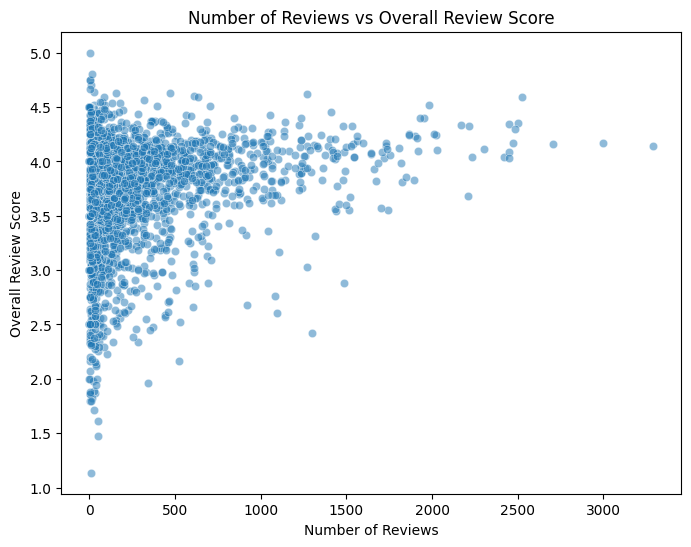

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='number_of_reviews', y='review_overall', alpha=0.5)
plt.title('Number of Reviews vs Overall Review Score')
plt.xlabel('Number of Reviews')
plt.ylabel('Overall Review Score')
plt.show()


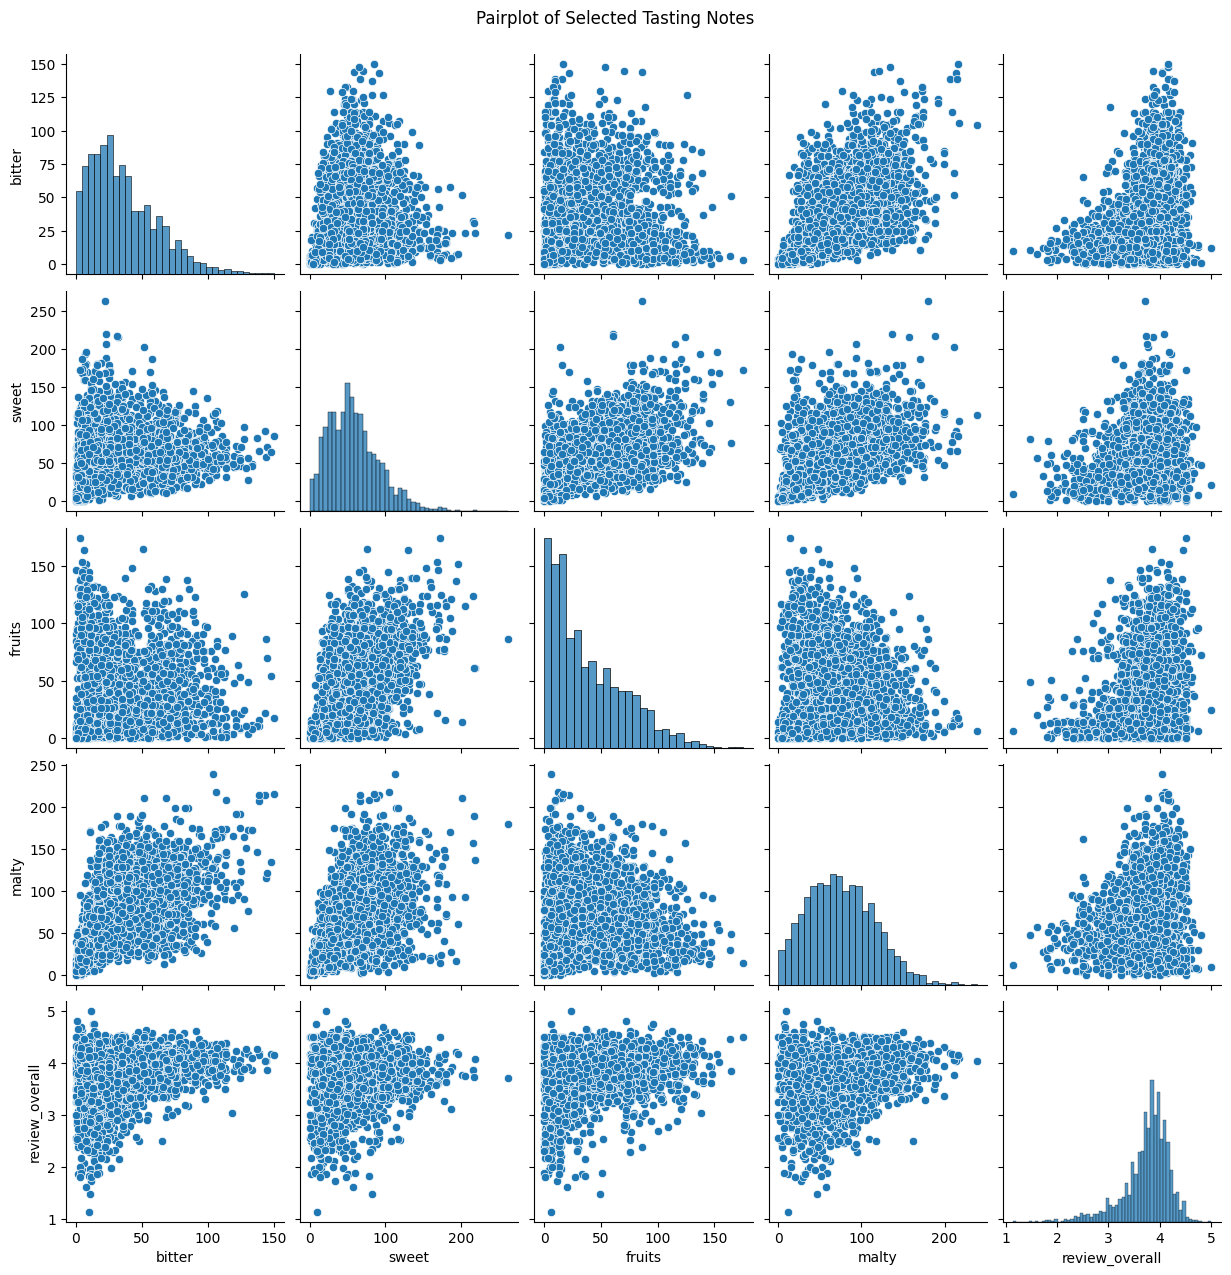

In [21]:
sns.pairplot(df[['bitter', 'sweet', 'fruits', 'malty', 'review_overall']])
plt.suptitle("Pairplot of Selected Tasting Notes", y=1.02)
plt.show()


## <span style="color: darkorange">Pre-Processing

In [23]:
from sklearn.preprocessing import StandardScaler

In [33]:
# features for clustering
feature_cols = [
    'abv', 'ibu', 'astringency', 'body', 'alcohol', 'bitter', 'sweet', 'sour',
    'salty', 'fruits', 'hoppy', 'spices', 'malty',
    'review_aroma', 'review_appearance', 'review_palate', 
    'review_taste', 'review_overall', 'number_of_reviews'
]

# for comparison later
styles = df['style']

In [35]:
# scaling
X = df[feature_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)
X_scaled_df.head()

,abv,ibu,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,-0.481696,0.444361,-0.337764,-0.544620,-0.464895,0.412438,0.458897,-0.004066,-0.477041,-0.171238,0.528815,-0.435553,0.893892,-0.277850,-0.291487,-0.231379,-0.114903,0.224124,0.728987
1,0.264397,0.444361,-0.433834,0.419002,0.054477,-0.130468,-0.095428,-0.479264,-0.477041,-0.449949,-0.194896,-0.267152,0.217253,0.317111,0.227495,0.542245,0.631911,0.645588,0.684759
2,-0.599501,0.444361,-0.241694,-0.351895,-0.638019,0.218543,-0.445528,-0.619028,-0.477041,-0.883498,0.430127,-0.603954,-0.334083,-0.455100,-0.216397,-0.132554,-0.139523,0.186208,0.397271
3,0.774882,0.444361,-0.337764,0.341912,0.804681,0.412438,1.246621,-0.423358,-0.008068,0.324247,-0.030416,-0.098752,1.094378,1.012280,0.693124,1.090072,0.985079,0.580600,0.372393
4,0.264397,0.444361,0.815081,0.187733,0.516141,0.296101,-0.387178,-0.674933,-0.008068,-0.852530,0.331439,0.069649,0.492921,-0.027406,0.544349,0.164376,0.123714,0.157999,-0.379497


## <span style="color: darkorange">Modeling

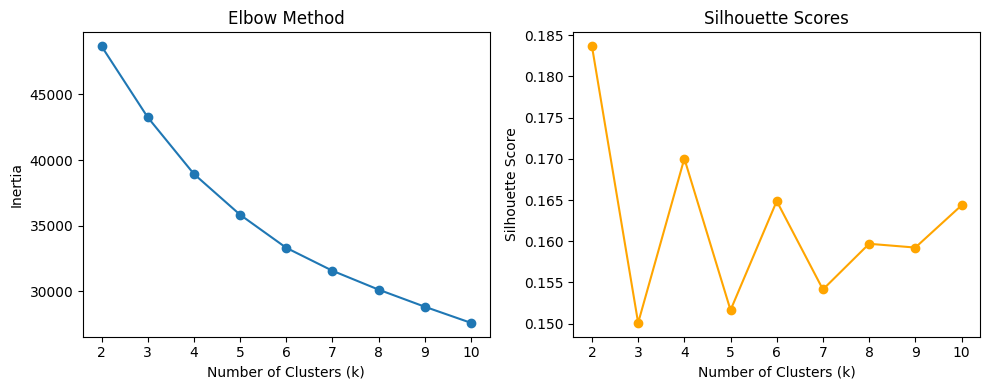

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [39]:
# fit k means
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to your original dataframe
df['kmeans_cluster'] = clusters


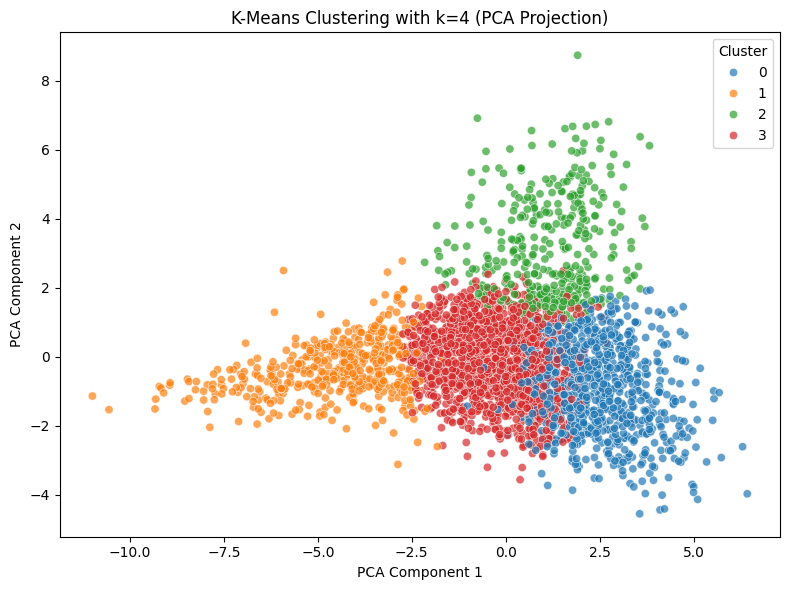

In [40]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='tab10', alpha=0.7)
plt.title(f'K-Means Clustering with k={k} (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [41]:
# Group by KMeans clusters and get mean values for interpretation
cluster_summary = df.groupby('kmeans_cluster')[
    ['abv', 'ibu', 'astringency', 'body', 'alcohol', 'bitter', 'sweet', 'sour',
     'salty', 'fruits', 'hoppy', 'spices', 'malty',
     'review_aroma', 'review_appearance', 'review_palate', 
     'review_taste', 'review_overall', 'number_of_reviews']
].mean()

# Optional: sort columns by similarity for readability
cluster_summary = cluster_summary.T  # Transpose for easier viewing
cluster_summary


kmeans_cluster,0,1,2,3
abv,9.005156,4.923974,6.715890,5.599513
ibu,46.273325,17.733624,21.277487,27.115713
astringency,12.251196,12.895197,29.068063,16.797502
body,66.843301,23.596070,36.054974,44.059829
alcohol,33.757177,11.561135,14.984293,10.051282
bitter,50.400718,17.962882,18.732984,38.618672
sweet,86.549043,31.521834,70.910995,47.608153
sour,29.294258,15.098253,104.837696,22.690993
salty,0.458134,1.069869,1.560209,1.172255
fruits,48.330144,15.912664,89.623037,27.120973
